In [2]:
from astropy.io import fits
from astropy.cosmology import WMAP9 as cosmo
import math
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly
from plotly.offline import plot, iplot, init_notebook_mode
import numpy as np

# 3.6 micrômetros

In [3]:
#Abre o mapa de fluxo em 3.6 mícrons
hdu_list = fits.open('NGC4501.phot.1.fits')
hdu_list.info()

Filename: NGC4501.phot.1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    2663   (1347, 1624)   float32   


In [4]:
image_data = hdu_list[0].data
fluxmap1 = image_data
fluxmap1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [5]:
# transformando o mapa de fluxo pra jansky: MJy --> Jy: 10^6
fluxmap3_6 = []
for i in range(len(image_data)):
    fluxmap3_6.append((image_data[i]-0.0433121))

fluxmap3_6final = []
for i in range(len(fluxmap3_6)):
    fluxmap3_6final.append(fluxmap3_6[i]*10**6*((0.75/206265)**2))

In [6]:
centrox = 730
centroy = 549
center = (centrox,centroy)

In [7]:
# Lista de raios
raios = np.array([ 0.15829918,  1.89959019,  3.6408812 ,  5.38217221,  7.12346322,
        8.86475423, 10.60604524, 12.34733625, 14.08862726, 15.82991827,
       17.57120928, 19.31250029, 21.0537913 , 22.79508231, 24.53637332,
       26.27766432, 28.01895533, 29.76024634, 31.50153735, 33.24282836,
       34.98411937, 36.72541038, 38.46670139, 40.2079924 , 41.94928341,
       43.69057442, 45.43186543, 47.17315644])

raios[16] # último raio considerado pro plot de massa estelar

28.01895533

In [8]:
diametropixel = 0.085993765
r = 0.26499737453264705/diametropixel
r

3.0815882352941175

In [9]:
# r = 10 #83 é o raio da galáxia em pixels (a galáxia tem 166 pixels de diâmetro, com centro em (528,967))
a, b = centrox,centroy
#Parameter equation

theta = np.arange(0, 2*np.pi, 0.01)
x = centrox + r * np.cos(theta)
y = centroy + r * np.sin(theta)

In [10]:
fluxo3_6 = []
for u in range(1347):
    for k in range(1624):
        if((u-centrox)**2 + (k-centroy)**2 <= r**2):
            fluxo3_6.append(fluxmap3_6final[k][u])
            
fluxototal3_6 = math.fsum(fluxo3_6)
print(fluxototal3_6)

0.02001181394240268


# 4.5 micrômetros

In [12]:
#Abre o mapa de fluxo em 4.5 mícrons
hdu_list = fits.open('NGC4501.phot.2.fits')
hdu_list.info()

Filename: NGC4501.phot.2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    2663   (1345, 1620)   float32   


In [13]:
image_data = hdu_list[0].data
fluxmap2 = image_data
fluxmap2

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [14]:
# transformando o mapa de fluxo pra jansky: MJy --> Jy: 10^6
fluxmap4_5 = []
for i in range(len(image_data)):
    fluxmap4_5.append((image_data[i]-0.0527009))

fluxmap4_5final = []
for i in range(len(fluxmap4_5)):
    fluxmap4_5final.append(fluxmap4_5[i]*10**6*((0.75/206265)**2))

In [15]:
centrox = 599
centroy = 1076
center = (centrox,centroy)

In [16]:
fluxo4_5 = []
for u in range(1346):
    for k in range(1620):
        if((u-centrox)**2 + (k-centroy)**2 <= r**2):
            fluxo4_5.append(fluxmap4_5final[k][u])
            
fluxototal4_5 = math.fsum(fluxo4_5)
print(fluxototal4_5)

0.012360689897333358


# Fluxos nos raios correspondentes aos pontos observacionais de HI de VIVA

Equação pra calcular a massa:

$$Massa\,\,(r) = 10^{5.65}\cdot Fluxo_{3.6 \mu m}^{2.85} \cdot Fluxo_{4.5 \mu m}^{-1.85}\cdot \left(\frac{Distância}{0.05}\right)^2 $$

In [17]:
massa_r = (10**(5.65))*((fluxototal3_6)**(2.85))*((fluxototal4_5)**(-1.85))*((21.74940951004901/0.05)**2)
# Fluxo em Jy; Massa (r) em massas solares; Distância em Mpc
massa_r

4124224688.005074

In [16]:
Massas = np.array([1506138982.9295492,39953883981.02126,
                   80742048829.24217,118915615636.5763,
                   148417648671.69058,170894927823.7103,
                   187637915451.97314,201035965711.05997,
                   210961680182.84366,217221121334.14322,
                   221650684252.26855,224614764471.17316,
                   226466315262.20654,227846581086.53265,
                   228628591706.5984,229141087980.39804,
                   229348245086.7581])

len(Massas)

17

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


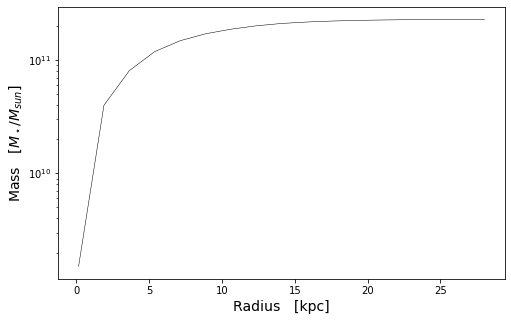

In [17]:
# Plotando as curvas

fig, ax = plt.subplots()
plt.plot(raios[0:17],Massas,"-",linewidth=0.5,color="#000000")
plt.gcf().set_size_inches(8, 5)
plt.xlabel("Radius   [kpc]",fontsize = 14)
plt.yscale("log")
plt.ylabel('Mass   [$M_\star/M_{sun}$]',fontsize=14)
plt.yscale("log")
# plt.xticks([0,100])
# plt.grid(True)
plt.legend(loc="lower right",frameon=False)

plt.show()

In [18]:
mass = []

for i in range(len(Massas)-1):
    mass.append(Massas[i+1]-Massas[i])
    
mass = np.array(mass)

mass = np.insert(mass, 0, Massas[0], axis=None)

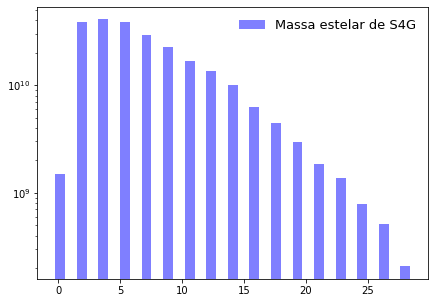

In [19]:
plt.figure(figsize=(7,5))

plt.bar(raios[0:17],mass,color="blue",alpha=0.5,label='Massa estelar de S4G')
plt.yscale("log")
plt.legend(frameon=False,fontsize=13)              

plt.show()

In [20]:
mass

array([1.50613898e+09, 3.84477450e+10, 4.07881648e+10, 3.81735668e+10,
       2.95020330e+10, 2.24772792e+10, 1.67429876e+10, 1.33980503e+10,
       9.92571447e+09, 6.25944115e+09, 4.42956292e+09, 2.96408022e+09,
       1.85155079e+09, 1.38026582e+09, 7.82010620e+08, 5.12496274e+08,
       2.07157106e+08])